In [1]:
from common import helpers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
power_levels = (
    2,
    4,
    6,
    8,
    10,
    12,
    14,
    16,
    18,
    20,
)

files_605 = (
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-59-56.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-58-15.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-56-56.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-55-37.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-54-10.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-52-41.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-50-51.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-48-25.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_21-47-27.raw',
r'D:\CZI_scope\code\data\raw\recording_2023-10-12_19-29-12.raw',
)

files_625 = (
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-12-56.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-10-55.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-09-22.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-07-52.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-06-29.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-05-04.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-03-52.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-02-34.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_01-00-15.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-13_00-57-50.raw',
)

pow_with_files_605 = list(zip(power_levels,files_605))
pow_with_files_625 = list(zip(power_levels,files_625))


In [3]:
evts_605 = [helpers.evts_to_df(helpers.load_evts_from_file(file)) for _, file in pow_with_files_605]
for i, e in enumerate(evts_605):
    e['power'] = pow_with_files_605[i][0] # add power to the dataframe

nevts_605 = [evt[evt['p'] == 0] for evt in evts_605]
nseries_605 = [helpers.event_df_to_time_series(nevt) for nevt in nevts_605] # convert events to time series
nseries_605 = [helpers.resample_time_series_by_group(s, '1ms', 'power') for s in nseries_605] # resample the time series to 1ms intervals
for s in nseries_605:
    s['elapsed_time'] = (s['t'] - s['t'].min()).dt.total_seconds() * helpers.resample_scale_factor('1ms')



In [4]:
evts_625 = [helpers.evts_to_df(helpers.load_evts_from_file(file)) for _, file in pow_with_files_625]
for i, e in enumerate(evts_625):
    e['power'] = pow_with_files_625[i][0] # add power to the dataframe

nevts_625 = [evt[evt['p'] == 0] for evt in evts_625]
nseries_625 = [helpers.event_df_to_time_series(nevt) for nevt in nevts_625] # convert events to time series
nseries_625 = [helpers.resample_time_series_by_group(s, '1ms', 'power') for s in nseries_625] # resample the time series to 1ms intervals
for s in nseries_625:
    s['elapsed_time'] = (s['t'] - s['t'].min()).dt.total_seconds() * helpers.resample_scale_factor('1ms')



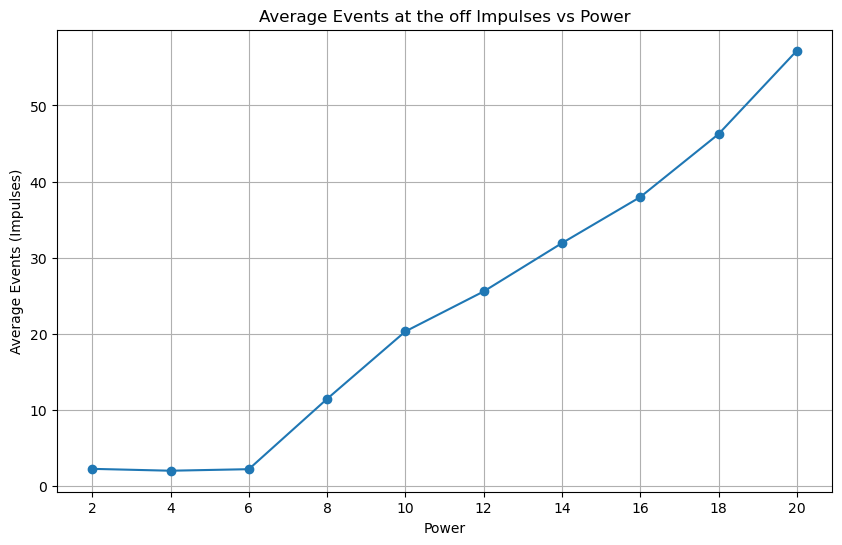

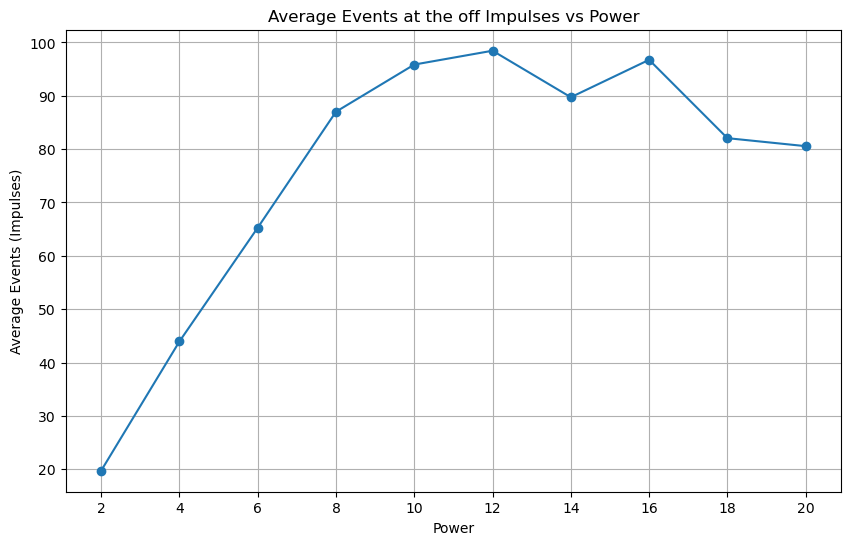

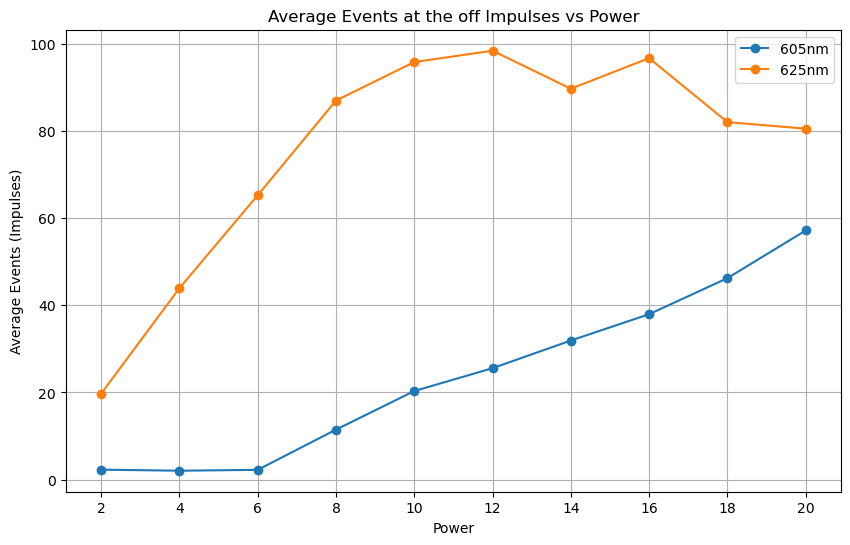

In [5]:
def compute_spike_average(s):
    """Compute average events per millisecond for spiking regions."""
    # Calculate mean and standard deviation
    mean = s['x'].mean()
    std = s['x'].std()
    
    # Define a threshold for spikes
    threshold = mean + 2 * std
    
    # Filter the spikes
    spikes = s[s['x'] > threshold]
    
    # Compute the average events per millisecond for spikes
    return spikes['x'].mean()

# Calculate the average events per millisecond for spikes for each power level
averages_605 = [compute_spike_average(s) for s in nseries_605]
averages_605 = averages_605[::-1]
averages_625 = [compute_spike_average(s) for s in nseries_625]
averages_625 = averages_625[::-1]
# Plot
plt.figure(figsize=(10, 6))
plt.plot(power_levels, averages_605, '-o')
plt.xlabel('Power')
plt.ylabel('Average Events (Impulses)')
plt.title('Average Events at the off Impulses vs Power')
plt.grid(True)
plt.xticks(power_levels)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(power_levels, averages_625, '-o')
plt.xlabel('Power')
plt.ylabel('Average Events (Impulses)')
plt.title('Average Events at the off Impulses vs Power')
plt.grid(True)
plt.xticks(power_levels)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(power_levels, averages_605, '-o', label='605nm')
plt.plot(power_levels, averages_625, '-o', label='625nm')
plt.xlabel('Power')
plt.ylabel('Average Events (Impulses)')
plt.title('Average Events at the off Impulses vs Power')
plt.legend()
plt.grid(True)
plt.xticks(power_levels)
plt.show()